<a href="https://colab.research.google.com/github/lotaa/AI-platform-notesbook-/blob/master/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import required Libraries**

In [ ]:
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np
from keras.models import predict_classes

**Construct Architecture**

In [ ]:
np.random.seed(42)
#Instantiate an empty model
model = Sequential()
#1st Convlutional Layer
model.add(Conv2D(filters=96, input_shape = (32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Max Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convlutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides= (1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convulational layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#4th Convulational Layer 
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#5th Convulational layer 
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#Max pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='same'))

#passing it to a Fully connected layer
model.add(Flatten())

#1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add a Dropout to prevent overfitting
model.add(Dropout(0.4))

#2nd Fully Connected Layer 
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#3rd Fully Connected Layer 
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
#add Dropout
model.add(Dropout(0.4))

#output Layer
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.summary()

#Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1

In [ ]:
#keras library for CIFAR10 dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Train-Validation-test spilt 
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val =train_test_split(x_train, y_train, test_size=0.3)

#Dimension of the CIFAR10 datasets
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

170508288/170498071 [==============================] - 2s 0us/step
((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#Ohot Encoding the labels
from sklearn.utils.multiclass import unique_labels
from keras.utils.np_utils import to_categorical

#since we have 10 classes we should expect the shape[1] of y_train, y_val ,y_test
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
y_train = to_categorical(y_train)

#verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
# Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range = 2, horizontal_flip =True, zoom_range =0.1)
val_generator = ImageDataGenerator(rotation_range = 2, horizontal_flip =True, zoom_range =0.1)
test_generator = ImageDataGenerator(rotation_range = 2, horizontal_flip =True, zoom_range =0.1)

#Fitting the agumentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
#learning Rate AnneaLer
from keras.callbacks import ReduceLROnPlateau
lrr = ReduceLROnPlateau(monitor ='val_acc', factor =0.01 , patience =3 ,min_lr =1e-5 )

In [ ]:
#Define parameters
batch_size =100
epochs =5
learn_rate =0.01

In [ ]:
model.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, steps_per_epoch= x_train.shape[0]//batch_size, validation_data=val_generator.flow(x_val, y_val, batch_size=batch_size), validation_steps=250, callbacks=[lrr],verbose=1 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
350/350 [==============================] - 68s 104ms/step - loss: 1.6462 - accuracy: 0.4090 - val_loss: 2.1120 - val_accuracy: 0.2708 - lr: 0.0010
Epoch 2/5
350/350 [==============================] - 26s 74ms/step - loss: 1.4040 - accuracy: 0.5049 - lr: 0.0010
Epoch 3/5
350/350 [==============================] - 26s 74ms/step - loss: 1.2908 - accuracy: 0.5485 - lr: 0.0010
Epoch 4/5
350/350 [==============================] - 26s 73ms/step - loss: 1.2029 - accuracy: 0.5831 - lr: 0.0010
Epoch 5/5
350/350 [==============================] - 26s 74ms/step - loss: 1.1227 - accuracy: 0.6114 - lr: 0.0010


In [ ]:
#Define function for confusion matrix plot
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes, normalization=False, title=None, cmap=plt.cm.Blues):
  if not title:
    if normalization:
      title ='Normalized confusion matrix'
    else:
      title ='confusion matrix, without Normalization'
      

  #compute confusion matrix 
  cm = confusion_matrix(y_true, y_pred)
  if normalization:
    cm =cm.astype('float') / cm.sum(axis=1)[:np.newaxis]
    print("Normalized confusion matrix")
  else:
      print("confusion matrix, without Normalization")
#print Confusion matrix
  fig, ax = plt.subplots(figsize=(7,7))
  img=ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(img, ax=ax)

  # We want show all ticks
  ax.set(#xticks=np.arange(cm.shape[1]),
         #yticks=np.arange(cm.shape[0]),
         #xtickslabels=classes, #ytickslabels=classes,
         title =title,
         ylabel='True label',
         xlabel='predict label'
  )
#Rotate the tick labels and set their alignment 
  plt.setp(ax.get_xticklabels(),rotation=45, ha='right', rotation_mode="anchor")

# Loop over data dimensions and create text annotations
  fmt='.2f' if normalization else 'd'
  thresh =cm.max() /2.0
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      ax.text(j, i, format(cm[i,j], fmt),
            ha ="center",va='center',color="white" if cm[i,j] > thresh else "black"
        )
    fig.tight_layout()
    return ax
import numpy as np

np.set_printoptions(precision=2)

In [ ]:
model.save('model.h5')


confusion matrix, without Normalization


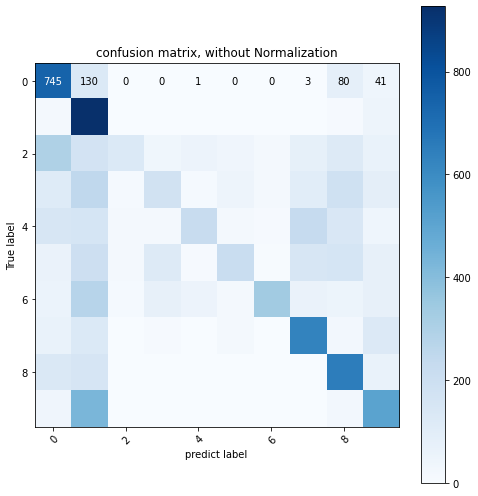

In [ ]:

y_pred=model.predict(x_test) 
y_pred=np.argmax(y_pred,axis=1)
#y_pred = model.predict_classes(np.array(x_test))

#y_pred = np.round(y_pred).astype(int)
y_true = np.argmax(y_test,axis=1)
labels = ["airplane","automobile","bird","cat","deer", "dog", "frog", "horse", "ship", "truck"]

cm = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(y_true, y_pred, classes=labels, title ='confusion matrix, without Normalization')

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy_ Score", accuracy_score(y_true,y_pred))

Accuracy_ Score 0.4534
